In [33]:
import pyart
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [21]:
file_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/radar/20230423_neumayer_mira.nc'
dayFile = nc.Dataset(file_path)

dbz = np.array(dayFile.variables['Zh'])
dbz[dbz > 1000] = np.nan
z = 10 ** (dbz / 10)
height = np.array(dayFile.variables['height'])
time = np.array(dayFile.variables['time'])

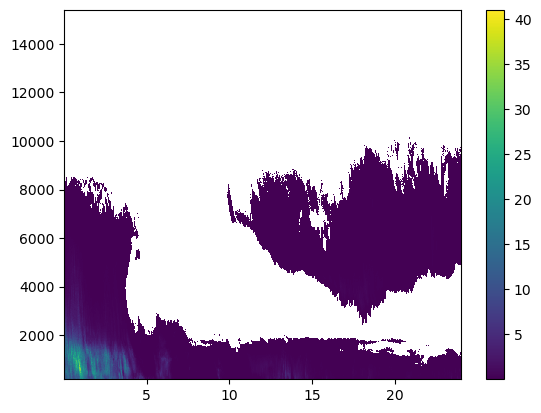

In [22]:
T, H = np.meshgrid(time, height)
plt.pcolormesh(time, height, z.T, shading='auto')
plt.colorbar()
#plt.ylim(top=500)

In [ ]:
# Empirical constants from Makrosov et al. (2022), Souverijns et al. (2017)
aLower = 11
aHigher = 63
b = 1.2

precipLower = (z / aHigher) ** (1 / b)
precipHigher = (z / aLower) ** (1 / b)


T, H = np.meshgrid(time, height)

Text(0.5, 1.0, 'Radar reflectivity precipitation')

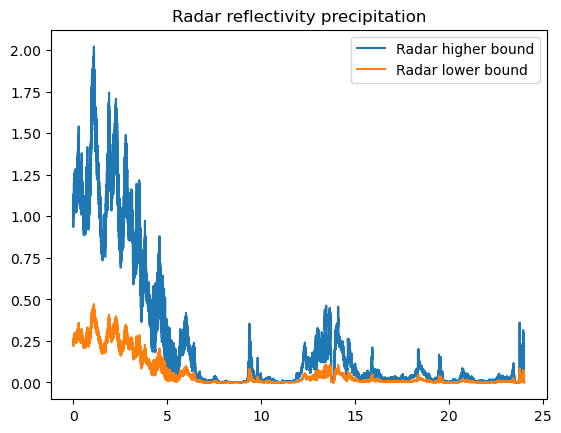

In [25]:
plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [17]:
disfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/disdrometer/20230423_neumayer_parsivel_0bc7d487.nc'
#newdayFile = nc.Dataset(newfile_path)

In [20]:
disdayFile = nc.Dataset(disfile_path)
print(disdayFile)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    year: 2023
    month: 04
    day: 23
    Conventions: CF-1.8
    cloudnet_file_type: disdrometer
    source: OTT HydroMet Parsivel2
    location: Neumayer Station
    title: Parsivel2 disdrometer from Neumayer Station
    references: https://doi.org/10.21105/joss.02123
    history: 2025-04-07 08:00:49 +00:00 - disdrometer metadata harmonized by CLU using cloudnet-processing v2.53.3
Data acquired with python script parsivel2nc.py
    file_uuid: 34548e57-a1fa-4cad-94e8-f74ffe8cb7c7
    serial_number: 450727
    pid: https://hdl.handle.net/21.12132/1.34548e57a1fa4cad
    cloudnet_processing_version: 2.53.3
    instrument_pid: https://hdl.handle.net/21.12132/3.0bc7d48784f14637
    dimensions(sizes): time(2879), diameter(32), velocity(32), nv(2)
    variables(dimensions): float64 time(time), int32 interval(time), float32 diameter(diameter), float32 diameter_spread(diameter), float32 diameter_bnds(diamet

In [48]:
rainRate = np.array(disdayFile.variables['rainfall_rate']) * 1000 * 60 * 60
disTime = np.array(disdayFile.variables['time'])


Text(0.5, 1.0, 'Radar reflectivity precipitation')

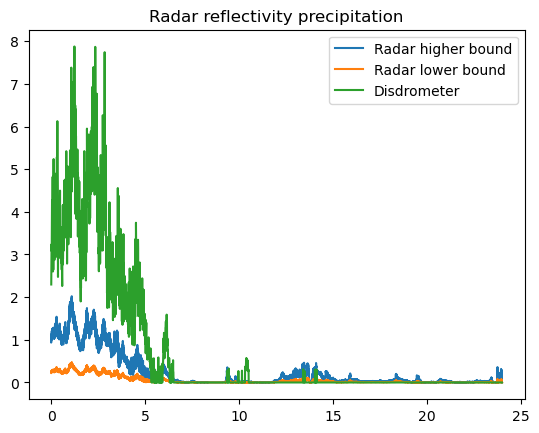

In [49]:
plt.plot(time, precipHigher[:, 0], label='Radar higher bound')
plt.plot(time, precipLower[:, 0], label='Radar lower bound')
plt.plot(disTime, rainRate, label='Disdrometer')
plt.legend()
plt.title("Radar reflectivity precipitation")

In [55]:
modfile_path = '/gws/nopw/j04/tone_ico_gws/cloudnet/neumayer/model/20230423_neumayer_ecmwf.nc'
modFile = nc.Dataset(modfile_path)

print(modFile)

<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    source: ECMWF Integrated Forecast System (IFS)
    institution: European Centre for Medium-Range Weather Forecasting
    initialization_time: 2023-04-23 00:00:00 +00:00
    Conventions: CF-1.8
    title: ECMWF IFS single-site output over Neumayer III
    location: Neumayer III
    file_uuid: 61ec3251-6a8f-449b-88d1-99aaeb519a87
    cloudnet_file_type: model
    year: 2023
    month: 04
    day: 23
    history: 2023-04-25 05:01:09 +00:00 - model metadata harmonized by CLU using cloudnet-processing v2.17.7
2023-04-25 04:46:10 +00:00 - NetCDF generated from original data by CLU using matlab on legacy.
    pid: https://hdl.handle.net/21.12132/1.61ec32516a8f449b
    dimensions(sizes): time(25), level(137), flux_level(138), frequency(2), soil_level(4)
    variables(dimensions): float32 latitude(), float32 longitude(), float32 horizontal_resolution(), float32 time(time), float32 forecast_time(time), int16

In [56]:
print("hi")

hi
